In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/NBA%20Players%20Career%20Duration/nba-players.csv")
data.head()

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [4]:
data.columns

Index(['Unnamed: 0', 'name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made',
       '3pa', '3p', 'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov', 'target_5yrs'],
      dtype='object')

In [5]:
data["Total_mins"] = data["gp"]*data["min"]
data["Total_mins"]

0        986.4
1        941.5
2       1132.2
3        672.8
4        552.0
         ...  
1335    1264.0
1336     856.8
1337     520.3
1338     624.0
1339     549.9
Name: Total_mins, Length: 1340, dtype: float64

In [6]:
field_goal = {}
field_goal['>= 60'] = len([k for k in data.fg if k >= 60])
field_goal['40-60'] = len([k for k in data.fg if (40 <= k) and (k < 60)])
field_goal['<40'] = len([k for k in data.fg if k < 40])

field_goal.keys()

dict_keys(['>= 60', '40-60', '<40'])

In [7]:
field_goal_df = data.fg.value_counts().reset_index()
field_goal_df.columns = ['field_goal', 'count']
field_goal_df[(field_goal_df.field_goal > 40) & (field_goal_df.field_goal < 50)]

,field_goal,count
0,42.6,15
1,41.5,15
2,43.9,15
3,43.0,15
4,45.5,14
...,...,...
195,48.9,2
199,49.2,2
200,44.0,2
206,48.8,2


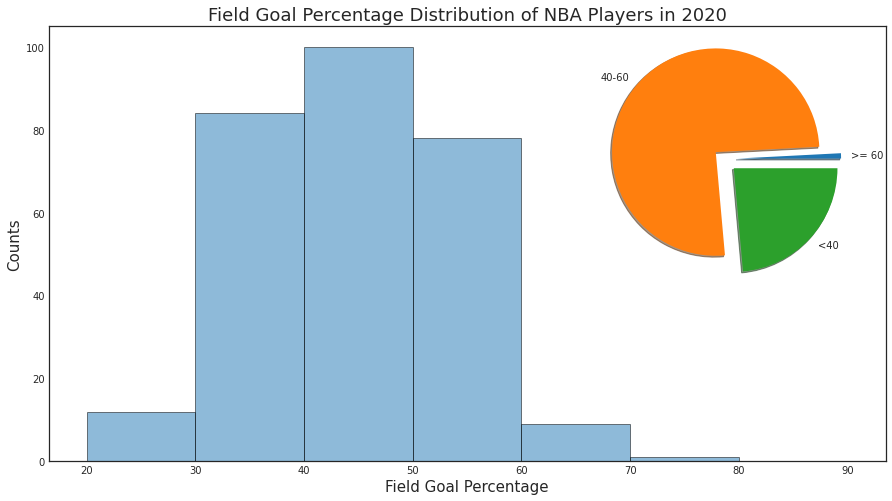

In [8]:
plt.style.use('seaborn-white')
plt.figure(figsize = (15, 8))
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.5, 0.2, 0.3])

bins = range(20, 100, 10)
ax1.hist(x = field_goal_df.field_goal, bins = bins, alpha = 0.5, ec = 'black')

ax2.pie(x = list(field_goal.values()), labels = list(field_goal.keys()),
       shadow = True, explode = (0.2, 0.15, 0.2),
       radius = 1.5)

ax1.set_title('Field Goal Percentage Distribution of NBA Players in 2020', fontsize = 18)
ax1.set_xlabel('Field Goal Percentage', fontsize = 15)
ax1.set_ylabel('Counts', fontsize = 15)
plt.show()

In [9]:
data.head()

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs,Total_mins
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0,986.4
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,941.5
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,1132.2
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,672.8
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1,552.0


In [10]:
data.columns

Index(['Unnamed: 0', 'name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made',
       '3pa', '3p', 'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov', 'target_5yrs', 'Total_mins'],
      dtype='object')

In [11]:
data[['3p', 'blk', 'oreb', 'dreb', 'ast', 'stl']]
three_p = data['3p'].value_counts().reset_index()
three_p.columns = ['3points', 'counts']
three_p

,3points,counts
0,0.0,451
1,33.3,39
2,25.0,34
3,20.0,26
4,16.7,24
...,...,...
249,29.6,1
250,36.2,1
251,28.9,1
252,33.9,1


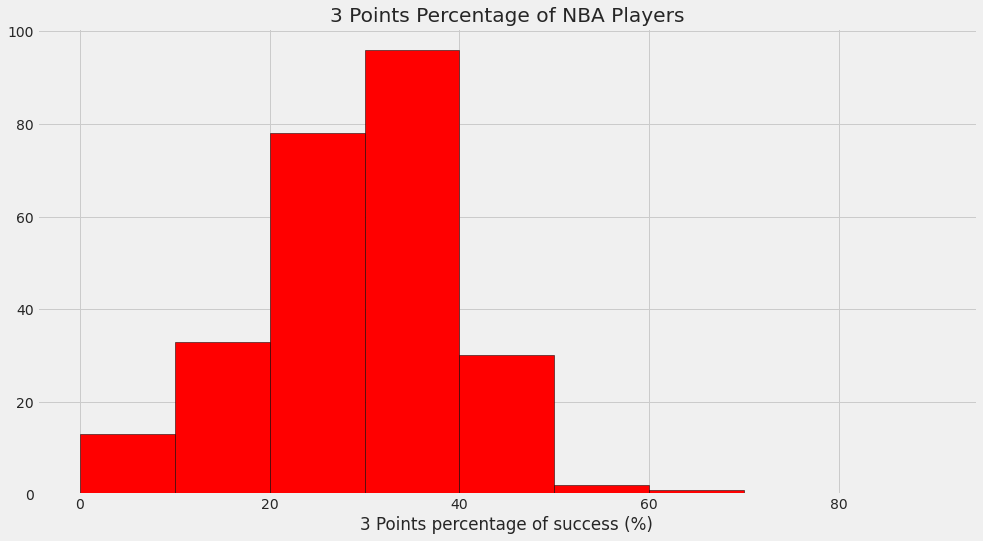

In [12]:
assist = data['ast'].value_counts().reset_index()
assist.columns = ['assist', 'counts']
assist = assist.sort_values('assist')
block = data['blk'].value_counts().reset_index()
block.columns = ['block', 'counts']
block = block.sort_values('block')
deffensive_reb = data['dreb'].value_counts().reset_index()
deffensive_reb.columns = ['dreb', 'counts']
deffensive_reb = deffensive_reb.sort_values('dreb')
steals = data['stl'].value_counts().reset_index()
steals.columns = ['steal', 'counts']
steals = steals.sort_values('steal')
plt.style.use('fivethirtyeight')
fig3, ax3 = plt.subplots(figsize = (15, 8))

ax3.hist(x = three_p['3points'],
         bins = range(0, 100, 10),
         color = 'red',
         ec = 'black')
ax3.set_title('3 Points Percentage of NBA Players')
ax3.set_xlabel('3 Points percentage of success (%)')

plt.show()

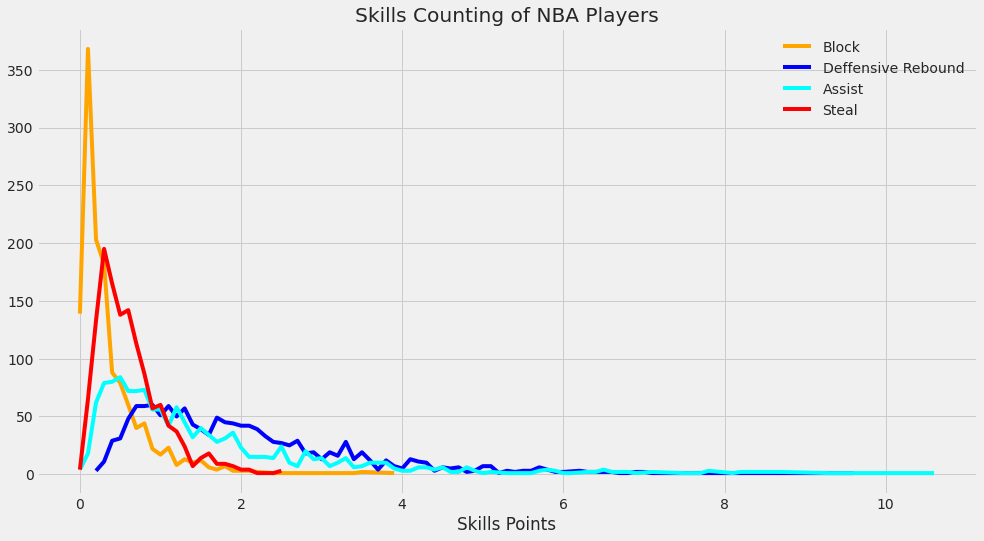

In [13]:
fig4, ax4 = plt.subplots(figsize = (15, 8))
ax4.plot(block.block, block.counts, color = 'orange', label = 'Block')
ax4.plot(deffensive_reb.dreb, deffensive_reb.counts, color = 'blue', label = 'Deffensive Rebound')
ax4.plot(assist.assist, assist.counts, color = 'cyan', label = 'Assist')
ax4.plot(steals.steal, steals.counts, color = 'red', label = 'Steal')

ax4.set_title('Skills Counting of NBA Players')
ax4.legend()
ax4.set_xlabel('Skills Points')

plt.show()

In [14]:
data.columns

Index(['Unnamed: 0', 'name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made',
       '3pa', '3p', 'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov', 'target_5yrs', 'Total_mins'],
      dtype='object')

In [15]:
data.ft.describe()

count    1340.000000
mean       70.300299
std        10.578479
min         0.000000
25%        64.700000
50%        71.250000
75%        77.600000
max       100.000000
Name: ft, dtype: float64

In [16]:
free_throw = {}
free_throw['>= 80'] = len([k for k in data.ft if k >= 80])
free_throw['60-80'] = len([k for k in data.ft if (k>=60) & (k < 80)])
free_throw['40-60'] = len([k for k in data.ft if (k>=40) & (k<60)])
free_throw['<40'] = len([k for k in data.ft if (k<40)])

free_throw

{'>= 80': 233, '60-80': 907, '40-60': 187, '<40': 13}

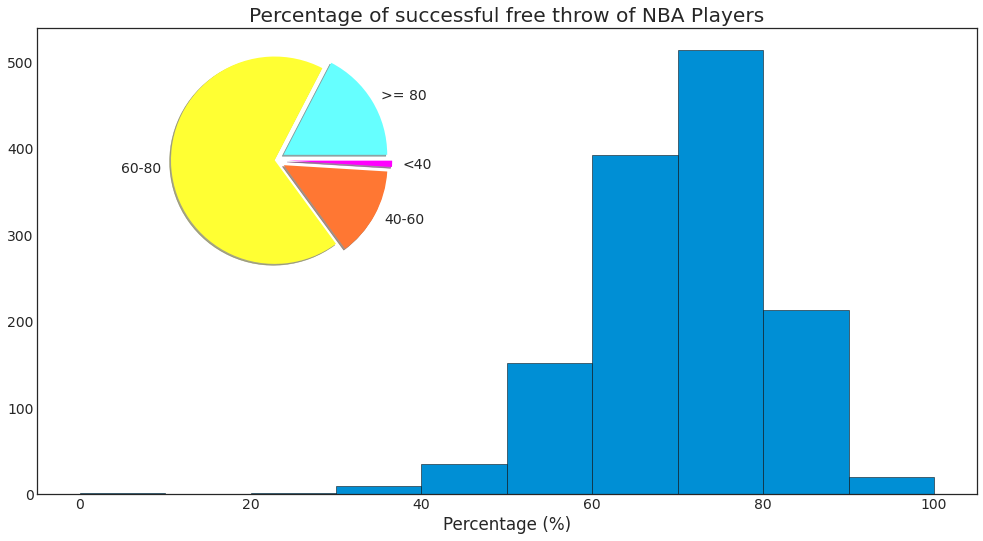

In [17]:
plt.style.use('seaborn-white')
plt.figure(figsize = (15, 8))
ax5 = plt.axes()
ax6 = plt.axes([0.2, 0.5, 0.2, 0.3])

colors = ['#66FFFF', '#FFFF33', '#FF7733', '#FF00FF']

ax5.hist(x = data.ft,
         bins = range(0, 110, 10), ec = 'black')
ax5.set_xlabel('Percentage (%)')
ax5.set_title('Percentage of successful free throw of NBA Players')


ax6.pie(list(free_throw.values()),
        labels = list(free_throw.keys()),
        colors = colors,
        explode = (0.15, 0, 0.15, 0.2),
        radius = 1.5, shadow = True)

plt.show()

In [18]:
data["target_5yrs"].value_counts()

1    831
0    509
Name: target_5yrs, dtype: int64

In [19]:
data.columns

Index(['Unnamed: 0', 'name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made',
       '3pa', '3p', 'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov', 'target_5yrs', 'Total_mins'],
      dtype='object')

In [20]:
total_mins = data.Total_mins
total_mins.describe()

count    1340.000000
mean     1150.204478
std       747.382409
min        43.400000
25%       525.150000
50%       988.450000
75%      1636.050000
max      3247.200000
Name: Total_mins, dtype: float64

In [21]:
def get_average_target(a, b):
    df = data[(data.Total_mins >= a) & (data.Total_mins < b)]
    return round(np.mean(df.target_5yrs), 2)

get_average_target(0, 500)

0.36

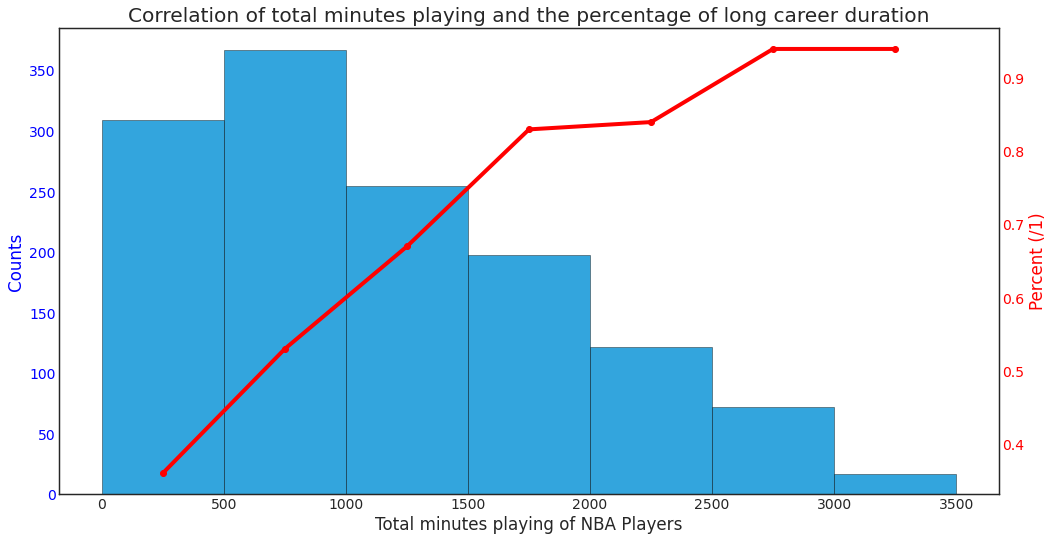

In [22]:
fig6, ax6 = plt.subplots(figsize = (15, 8))
bins = range(0, 4000, 500)
x = range(250, 3500, 500)
y = [get_average_target(bins[i], bins[i+1]) for i in range(len(bins)-1)]
ax6.hist(total_mins,
         bins = bins,
         alpha = 0.8,
         ec = 'black')

ax6_ = ax6.twinx()
ax6_.plot(x, y, 'r-o')

ax6.set_xlabel('Total minutes playing of NBA Players')
ax6.set_title('Correlation of total minutes playing and the percentage of long career duration')

ax6.set_ylabel('Counts', color = 'blue')
ax6_.set_ylabel('Percent (/1)', color = 'red')

ax6.tick_params(axis = 'y', colors = 'blue')
ax6_.tick_params(axis = 'y', colors = 'red')

In [23]:
top_3p = data['3p_made'].value_counts().reset_index()
top_3p.columns = ['3p_made', 'counts']
top_3p = top_3p.sort_values('3p_made', ascending = False)
top_3p.head()

,3p_made,counts
21,2.3,1
22,2.1,1
20,2.0,2
18,1.9,4
17,1.8,4


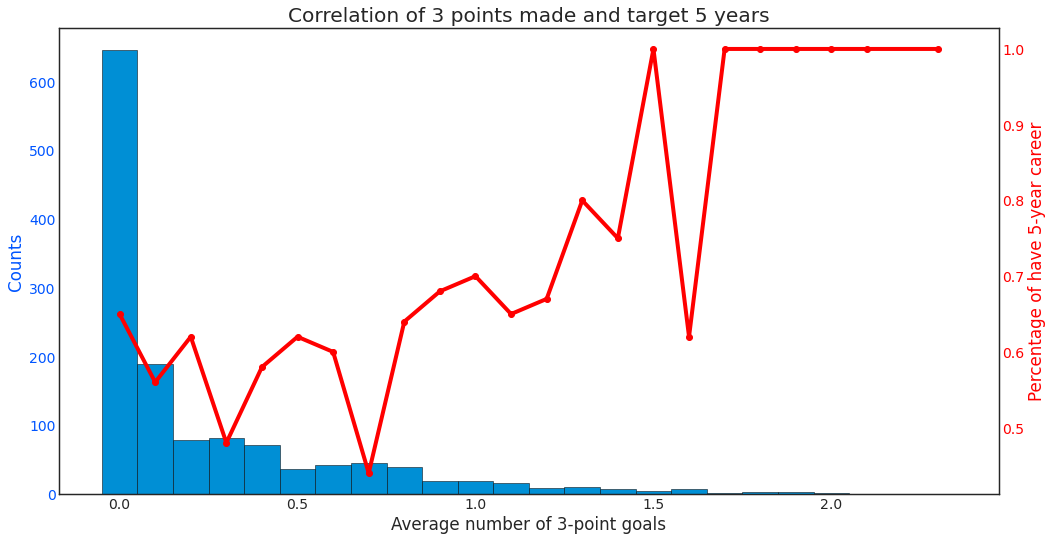

In [24]:
def get_average_5yrs_3pm(points):
    df = data[data['3p_made'] == points]
    return round(np.mean(df.target_5yrs), 2)
fig7, ax7 = plt.subplots(figsize = (15, 8))

height = top_3p.counts

ax7.bar(x = top_3p['3p_made'], width = 0.1, 
        height = height,ec = 'black')

ax7_ = ax7.twinx()
ax7_.plot(top_3p['3p_made'],
          [get_average_5yrs_3pm(i) for i in top_3p['3p_made']],
          'r-o')
ax7.set_title('Correlation of 3 points made and target 5 years')
ax7.set_ylabel('Counts', color = '#0055FF')
ax7_.set_ylabel('Percentage of have 5-year career', color = 'red')

ax7.set_xlabel('Average number of 3-point goals')

ax7.tick_params(axis = 'y', colors = '#0055FF')
ax7_.tick_params(axis = 'y', colors = 'red')

plt.show()

In [25]:
assist = data.ast.value_counts().reset_index()
assist.columns = ['assist', 'counts']
assist = assist.sort_values('assist')
assist

,assist,counts
46,0.0,4
21,0.1,18
6,0.2,62
2,0.3,79
1,0.4,80
...,...,...
58,8.2,2
55,8.3,2
59,8.7,2
65,9.3,1


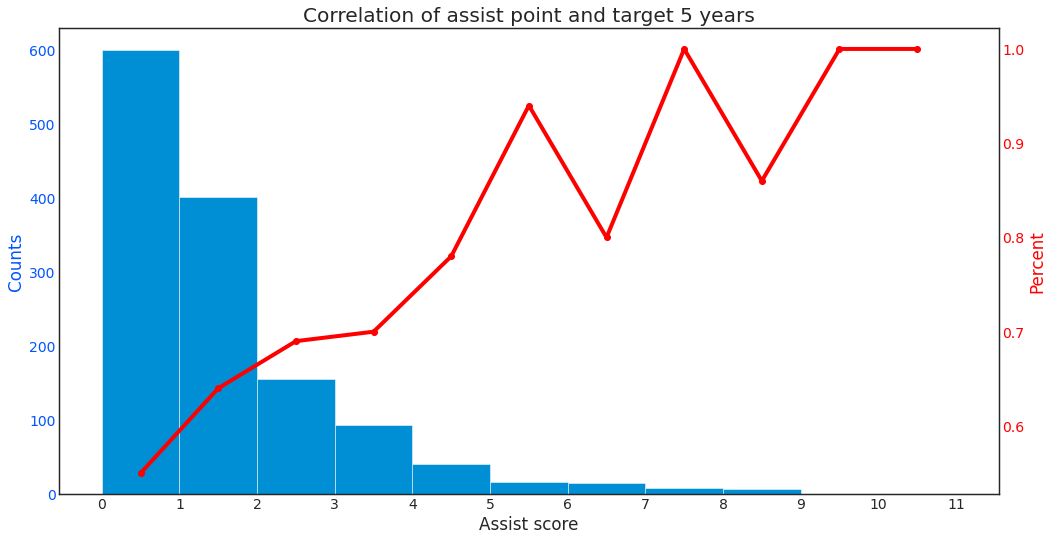

In [26]:
def get_avr_5yrs_assist(a, b):
    df = data[(data['ast'] >= a) & (data['ast'] < b)]
    return round(np.mean(df.target_5yrs), 2)
fig8, ax8 = plt.subplots(figsize = (15, 8))
bins8 = range(12)

ax8.hist(data.ast, bins = bins8, ec = 'white')
ax8.set_xticks(bins8)

ax8_ = ax8.twinx()
ax8_.plot([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5], 
          [get_avr_5yrs_assist(bins8[i], bins8[i+1]) for i in range(11)], 'r-o')

ax8.set_title('Correlation of assist point and target 5 years')
ax8.set_xlabel('Assist score')
ax8.set_ylabel('Counts', color = '#0055FF')
ax8_.set_ylabel('Percent', color = 'red')

ax8.tick_params(axis = 'y', colors = '#0055FF')
ax8_.tick_params(axis = 'y', colors = 'red')

plt.show()